# Hierarchical Clustering

## Context and Basics

### Setup

The code below imports libraries, set up variables and define functions which are used later on in the LU to aid understanding the content of this notebook. Run the cell below, and feel free to ignore its content.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#Code for pictures

X_, y_ = datasets.load_iris(return_X_y = True)

idx = []

for i, j in zip(range(0,50),zip(range(50,100),range(100,150))):
    idx.extend((i,j[0],j[1]))

X = X_[idx]
y = y_[idx]

Xs = X[0:30]
ys = y[0:30]

Xss = []
yss = []

for i, tup in enumerate(Xs):
    if (Xs[i,2] > 4 and Xs[i,2] < 5.4) and Xs[i,1] > 2.5:
        Xss.append(Xs[i,:])
        yss.append(ys[i])
        
Xs = np.array(Xss)
ys = np.array(yss)

colours = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"]=10,8

In [ ]:
# Plotting the pics example: last step divisive

cls = colours[0:8]

for idx, tupl in enumerate(Xs):
    if Xs[idx,1] >3:
        cls[idx] = colours[0]
    elif Xs[idx,2] < 4.8:
        cls[idx] = colours[1]
        
plt.scatter(Xs[:,2],Xs[:,1], s= 150, color=cls)
plt.xlim(4.2,5.3)
plt.ylim(2.5,3.5)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])

plt.show()

## Aims of this Course

* Give an **overview** of clustering and hierarchical clustering.
* **Motivate and describe** a simple agglomerative clustering algorithm.
* Introduce **pre-existing implementations** and approaches.
* **Demonstrate the application** of hierarchical clustering on data.

Clustering is a broad and complicated topic; hierarchical clustering is a well-used aspect of clustering. We will start by motivating why we're interested in hierarchical clustering. We'll then motivate the intuition behind a clustering approach know as **agglomerative clustering**, and walk you through the simplest version of the algorithm. In practice this simple version is rarely used because it is quite slow for large data; but many widely used hierarchical clustering algorithms are optimised variants of this starting point. We will then move on to look at an implementation of agglomerative clustering in **sklearn**, and you will have a chance to try your hand at clustering some toy data.

## What is Clustering?

Clustering is the act of **grouping data items** in such a way that **objects that share a cluster are more similar** than those that do not.

Clustering is used for:
* **Data mining**/knowledge discovery.
* Improving **downstream tasks**.
* Statistical **data analysis**.

For any real world dataset, you would expect some data items to be more similar than other data items. Groups of similar data items might share many meaningful characteristics. Identifying these groups can provide insight into the data, allow you to identify data of interest, and improve downstream tasks. 

Unfortunately, these groups are generally not provided; we have to **extract them**. This process of pulling apart your data and grouping it by similarity is called **'clustering'**. Because we don't have labels to work with, this is normally an **unsupervised** learning problem.

## What is Clustering?

Clustering is used in many fields, such as:
* Disease subtyping
* Bioinformatics
* Machine Learning
* Topic Modelling
* ...and **many more**.

## Flat versus Hierarchical

There are many different approaches to clustering. One way in which approaches differ is whether they return **flat clusters** - where each data item is only assigned to a single cluster, or **hierarchical clusters** - where clusters are made up of smaller clusters, which in turn are made up of smaller clusters.

## Flat clustering

**Flat clusters**; each point is only assigned to a single cluster.

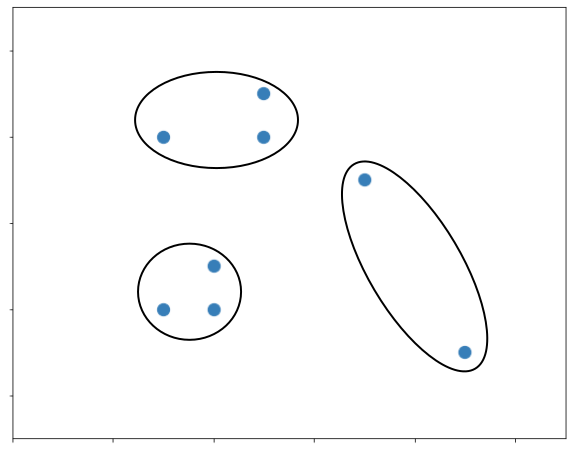


The simplest form of clustering returns **flat clusters**; namely, each data point gets assigned to a single cluster, and once all data points have been assigned, the task is complete. Most algorithms of this sort (for example, k-means) require the user to choose in advance the number of clusters. This can be a problem if the user has no idea how many meaningful clusters there might be in the data. There are ways to try to cope with this, but they are beyond the remit of this course.

Here, 8 points have been divided (rather arbitrarily) between three clusters.

(🦉 *Note; for interested students, an example of clustering that doesn't require the number of clusters to be specified in advance uses Dirichlet Process Mixture Models. However, these sorts of approaches come with their own caveats - as with everything, common sense derives from understanding properly what your model is doing.*)

## Hierarchical Clustering

**Hierarchical clusters**; each point can be assigned to multiple clusters in a hierarchy.

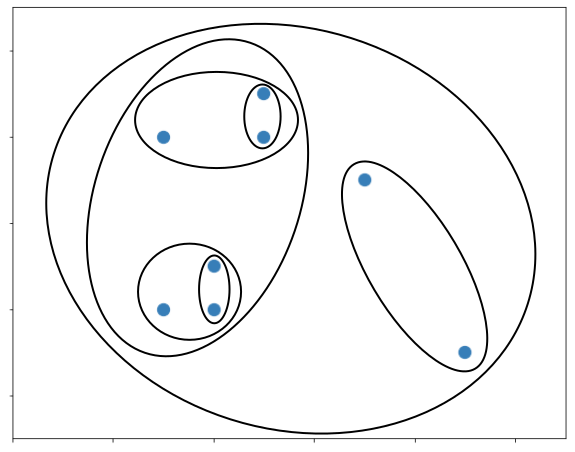



However, sometimes we want more information about data structure than we can get from flat clusters. In this case, a **hierarchy of clusters** may be of help; where clusters are themselves clustered together. This way one can learn more detailed relationships between data points and groups of data points than simply determining whether data points are in the same cluster or not.

The eight points in the plot are now hierarchically related; each point can be related to another point in terms of the number of clusters they share.

## Why Hierarchical Clustering?

**Hierarchical clustering** is useful because real data are often structured in a hierarchical fashion. Examples include:
* Living species
* Words
* Geographical locations


A lot of real world data are hierarchically structured. Examples include:

* The taxonomy of living creatures; similar **species** are grouped as a **genus**, similar genuses as a **family**, and so on, all the way up to **kingdom** and **domain**.
* Words can be grouped hierarchically by **semantic similarity**. All the words for **cars**, for example, form a sub-cluster of all the words for **vehicle**, and so on.
* Geography is generally hierarchical; if our data items were **towns**, we could group them by **region**, and then by **country**, and then by **continent**.

You should already be able to see that there may be multiple ways to cluster things. Instead of jumping straight to region, perhaps I should have included **county** as an intermediate step when clustering towns. As with any unsupervised task, there may be more than one good answer.

## Pros and Cons of Hierarchical clustering

**Pros** include:
* Easy to understand
* Straightforward to code
* Main output (Dendrograms) are interpretable

**Cons** include:
* Can return poor solution for high dimensional data, 
* More modern (but more complicated!) alternatives exist
* Can take a while to run if you have a lot of data

Hierarchical clustering is probably the simplest unsupervised clustering approach. Its appeal is that by clustering and providing a hierarchical structure to the data, it can be readily interpreted, and gives substantial insight into a dataset. However, as it is quite an old method, there are better, more modern alternatives (latent class analysis, self-organising maps etc). These methods are much more complicated, but may provide better (and faster) solutions on big, high-dimensional data.

## Agglomerative versus **Divisive**

To create a hierarchy from data, there are **two** basic algorithmic approaches. **The first is**:

1. Treat every data point as part of the same cluster.
2. Divide that first cluster into two sub-clusters according to some metric.
3. For each sub-cluster, divide into sub-sub-clusters.
4. Repeat until some stopping criterion is achieved (or until the smallest sub-clusters are single data points).

This is **divisive** clustering.

When creating a hierarchy there are really two ways to approach the problem; **bottom up**, or **top down**. It'll be easier to see how this works visually. Let's start with the **divisive** approach, which is top town.

## Agglomerative versus **Divisive**



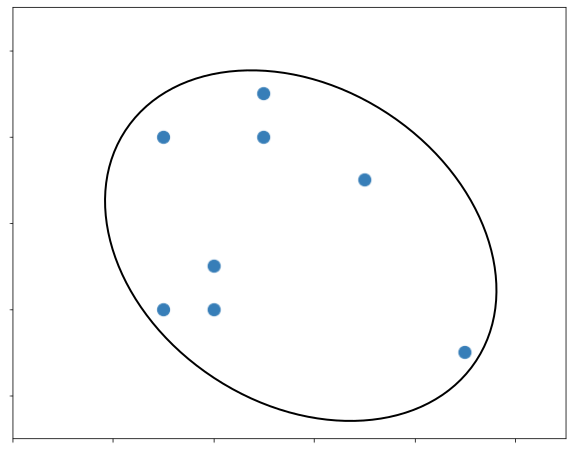


**Divisive** clustering starts by assuming that all eight of our points are part of the same cluster.

## Agglomerative versus **Divisive**



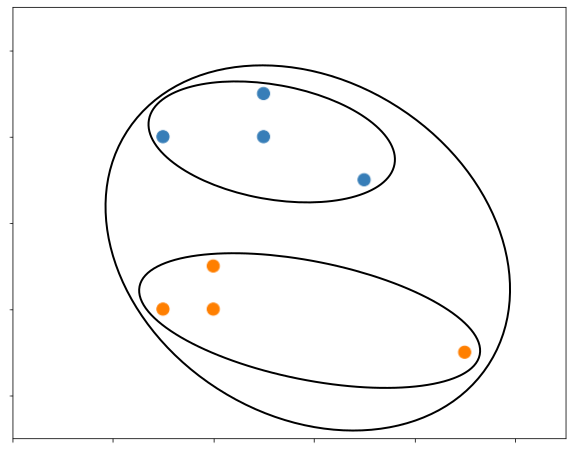

Then, using some metric, we divide the larger cluster into two sub clusters; here, the blue and orange points. The metric used perform this step is heuristic; we simply pick two groups that appear resonably separate. Defining an **automatic divisive metric** can be relatively hard. For example, finding the line or plane that best separates some of the points from some of the others requires considering all possible lines (there are $\infty$ of them, subject to some constraints).

## Agglomerative versus **Divisive**


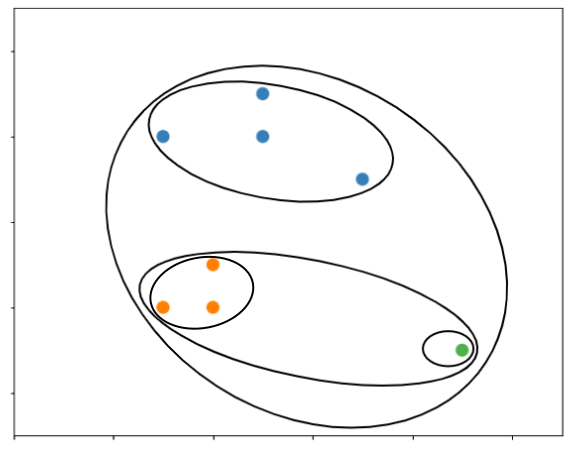

In the third step, we pick the cluster that appears most easily separable (the orange one) and divide it into sub clusters. These sub clusters are now uneven; but this reflects the fact that the green dot is an outlier.

## **Agglomerative** versus Divisive

To create a hierarchy from data, there are **two** basic algorithmic approaches. **The second is**:

1. Treat every data point as a single cluster.
2. Combine the two closest clusters into a single super-cluster according to some metric.
4. Repeat until some stopping criterion is achieved (or until all points are in the same super-cluster).

This is **agglomerative** clustering. 

Secondly, we have agglomerative, which is **bottom up**.

## **Agglomerative** versus Divisive


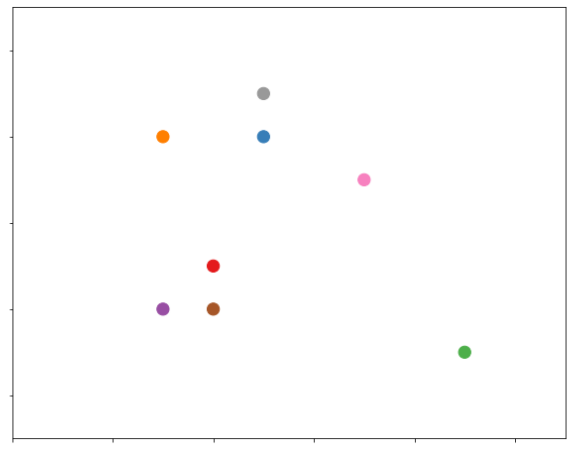

We begin by assuming every point is its own cluster. It turns out it's a lot easier to proceed in a bottom up fashion. Assuming we want to proceed by combining the closest points, all we have to consider is the $C$x$C$ matrix (where $C$ is the number of clusters; at the first step, that's identical to the number of points) with elements $D(c_i,c_j)$, the distance between cluster $c_i$ and cluster $c_j$. At each step, we simply pick the two clusters with the smallest $D(.,.)$, and combine them into a single cluster.

## **Agglomerative** versus Divisive



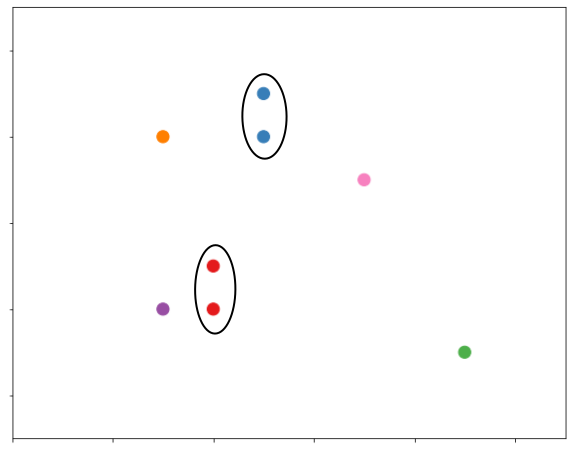


After two steps, we combine the four points into two new clusters as shown above.

## **Agglomerative** versus Divisive

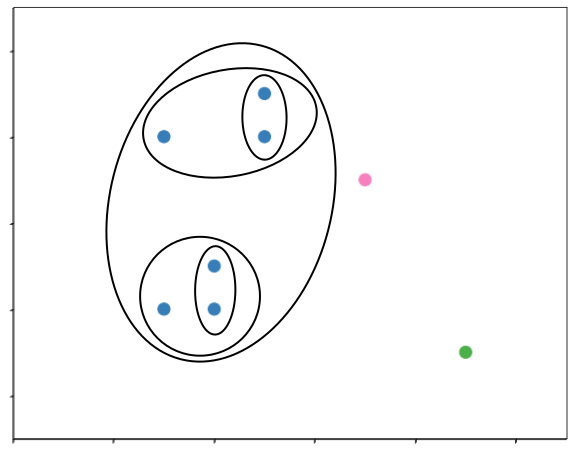

After five steps, our hierarchy might look something like this; apart from a couple of outliers, we've started to build something that captures the relationships between the various points.

For the rest of this course, we're going to focus on **agglomerative clustering**. **Divisive** clustering is sometimes used, but as discussed, relies on heuristics to reduce the search space. Agglomerative clustering algorithms are more common, and arguably easier to debug/understand.

## Two decisions 

The first two main questions we need to resolve to run agglomerative clustering are: 

* What is the **distance measure** $D(\pmb x,\pmb y)$?
* **Where** do we measure distances between data points?


## Two decisions - distance

For now, given our data are real values, we use **Euclidean distance**,

$$ D(\pmb x,\pmb y) = \sqrt{\sum_{i=1}^{i=n} (x_i - y_i)^2}. $$

Here, $\pmb x$ and $\pmb y$ are the two clusters of interest, and $n$ is the dimensionality of the space. 

Euclidean distance is one of the simplest methods to measure distance. You might want to use different distance measures, depending on your prior knowledge of the data.

Distance measures are important because they **encode your assumptions about what constitutes similiarity** for your data. For example, consider the hierarchical structure of taxonomy, mentioned above. Historically, before the advent of genetics, the taxonomic distance measure was **phenotpye**; naturalists would determine how close a species was to another species by questions like 'do they both have skeletons?', 'can they both fly?'. However, modern genetics has shifted the distance measure to a **phylogenetic** one; the distance between species is a function of their nearest common evolutionary ancestor, determined by their genetics.

(🦉 *Note; students may observe that the space in which your data is distributed also plays a large role in what your distance measure means; indeed, a substantial area of research involves learning good embedding spaces such that simple distance metrics capture lots of data-specific meaning. We won't go into this here, as it is beyond the scope of this course.*)

## Two decisions - linkage

Linkage determines where we measure distances between data points during the clustering process. Apart from at the start of our algorithm, where every point is considered single cluster, we have multiple choices. There are various linkage options to consider, and one example is **single-linkage**:

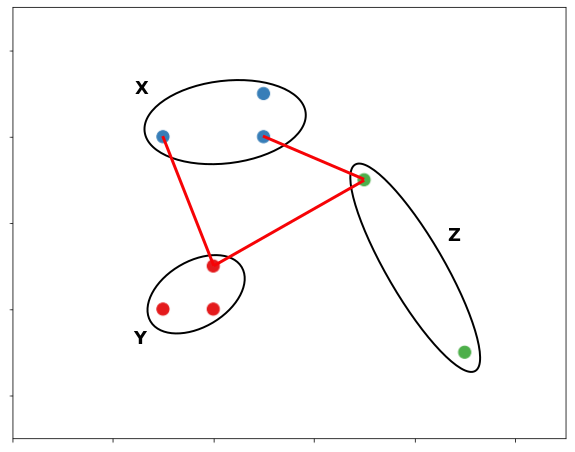


The first approach we could take is to measure $D(c_i,c_j)$ between the **two closest points** in $c_i$ and $c_j$. This is called **single-linkage**.

In the example shown here, eight points are divided into three clusters, $X$, $Y$, and $Z$. The red lines denote the distances $D(X,Y)$, $D(X,Z)$, and $D(Z,Y)$ under a **single-linkage** metric. As $D(X,Z)$ is the shortest, we would combine cluster $Z$ with cluster $X$ as the next step in an agglomerative clustering algorithm.

## Two decisions - linkage

Secondly, where should we measure from? This is called **linkage**. Apart from at the start of our algorithm, where every point is a single cluster, we have multiple choices. Examples include **complete-linkage**:

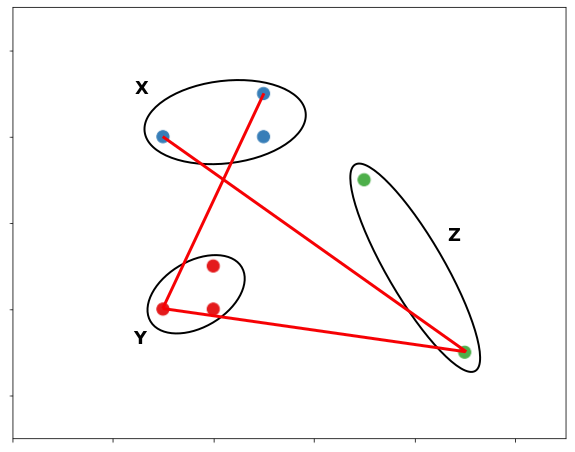


A criticism of single linkage might be that just because two points in two clusters are reasonably close together, it doesn't follow that all the points in those clusters are as similar. Whilst the closest point in cluster $Z$ to cluster $X$ is quite similar to all of the points in $X$, the **other** point in $Z$ is further away from all the points in cluster $X$ than any other point (including those in cluster $Y$). 

The solution to this is **complete-linkage**. This takes $D(c_i,c_j)$ to be the distance between the **furthest** two points in $c_i$ and $c_j$. Here the red lines again show $D(X,Y)$, $D(X,Z)$, and $D(Z,Y)$, but under a **complete-linkage** metric. As $D(X,Y)$ is now the shortest distance, we should combine cluster $X$ with cluster $Y$ for the next step.

## Two decisions - linkage

Secondly, where should we measure from? This is called **linkage**. Apart from at the start of our algorithm, where every point is a single cluster, we have multiple choices. Examples include **average-linkage**:

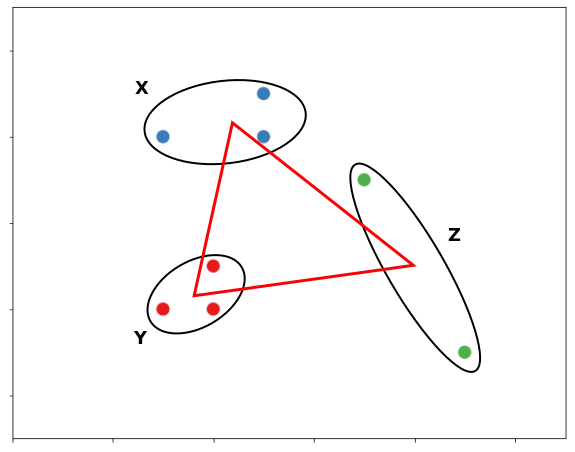


Complete-linkage clustering tends to favor merging smaller clusters before larger ones. However, it does not consider the distribution of points within a cluster. For instance, even if most points in a cluster are clustered closely near one edge, complete-linkage clustering might be influenced by a single distant outlier to exclude that cluster from potential combinations.

This leads to an alternative approach known as average-linkage. In its fundamental form, we calculate $D(c_i, c_j)$ as the distance between the averages of the points in clusters $c_i$ and $c_j$. There are various methods for computing averages, each of which assigns different weights to the points. However, the core concept remains the same: capturing the **centre of mass** within a cluster, a location that may or may not correspond to an actual data point but represents the cluster as a whole.

In the diagram above, a simple unweighted average of the points is utilized. The red lines represent the distances $D(X,Y)$, $D(X,Z)$, and $D(Z,Y)$, and we can observe that this comparison is much closer compared to the previous two linkage methods. Although $D(X,Y)$ is the shortest, it's only slightly so.

The choice of linkage and distance metric constitutes the two primary decisions to be made when employing the simple agglomerative clustering algorithm. Let's now thoroughly review the algorithm.

## Agglomerative Clustering Algorithm

For some data $\{x_1, ..., x_N \}$, some distance measure $D(i,j)$, and some linkage method:

1. Initialise a list of clusters, $C$, and add $N$ clusters  $\{c_1, ..., c_N\}$ to it. Assign **each data point to a single cluster**.
2. **Find the cluster pair** that satisfies $min_{ij} D(c_j,c_i)$, subject to the linkage method, where $i,j = 1,...,M$, $i \neq j$, and $M = |C|$. In case of ties, choose randomly from those pairs which satisfy the constraint.
3. **Merge the clusters** $c_i$ and $c_j$ into a single cluster $c_{ij}$ which contains all elements of both.
4. Remove $c_i$ and $c_j$ from $C$.
5. Add $c_{ij}$ to $C$.
6. If $C$ contains one cluster, i.e. if $M = 1$, **end**.
7. Else, **repeat from 2**.

## Agglomerative Clustering Implementation.

In python, there is good support for agglomerative clustering. `scipy.cluster.hierarchy` has several functions which do this. For example, to cluster some data $X$, we could run the `linkage` function:

In [ ]:
#Load Iris Dataset

from sklearn import datasets
X, y = datasets.load_iris(return_X_y = True)

In [ ]:
from scipy.cluster.hierarchy import linkage

cluster = linkage(X, method='single',metric='euclidean')

`method` lets us choose the type of linkage we want to use. `metric` is the choice of $D(c_i,c_j)$. 

$X$ here is taken from the iris dataset, which we'll revisit in the practical. The main thing to note is that is has shape $(N,D)$, where $N$ is the number of data points, and $D$ is the dimensionality of the data.

## Data presentation: Dendrograms

How should a hierarchy be represented? The standard approach is to use a **dendrogram**.

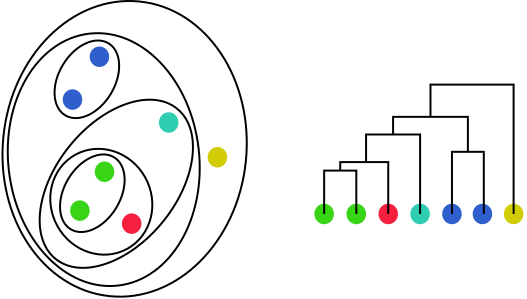

We can see that drawing circles around the clusters rapidly loses clarity (and indeed doesn't scale to more than two dimensions, or to categorical data). The general way to represent a hierarchy is to use a tree structure called a **dendrogram**. 

Here, each link represents which data points are connected together; if to scale, the height of the horizontal connecting bar between two groups $c_i$, $c_j$ should be $D(c_i,c_j)$.

## Data presentation: Dendrograms implementation

**Plotting a dendrogram** once we have run the `linkage` function is as straightforward as running a second function, `dendrogram`, and passing it the variable `cluster`:

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

cluster = linkage(X, method='single',metric='euclidean')
dendrogram(cluster)
plt.show()

The resultant dendrogram can be hard to read (other than the fact that single linkage has clearly recovered two distinct super-clusters). This is a dendrogram for 150 data points. Most datasets will have far more than 150 data points, which means their dendrograms will be even more incomprehensible. Fortunately, there is a straightforward way to simplify our results.

## Truncation

There is a final post-processing step which can be very useful when it comes to **interpreting results** called **truncation**. 

To implement truncation, we select a specific height on the dendrogram and consider it as the lower boundary of the hierarchy. Each point is then assigned to the cluster at that level, forming its smallest cluster.

We will further examine this concept in the practical. The main idea here is that we choose a level of detail by cutting the dendrogram at a particular level, and treating all clusters below that level as irrelevant. This gives  a large-scale understanding of major structure in our data, without explicitly tracking the clustering all the way down to a finer granularity. For large datasets, this is a necessary step.

Truncation can yield a **flat clustering** from the hierarchy; in this case, we treat each data point as being assigned to the cluster it is in at the level of truncation, and ignore all super- and sub-clusters.

The choice of where to truncate is entirely up to the user; it depends on what the user is looking for, and can often be the subject of some trial and error. It is analogous to the problem of choosing the number of clusters in flat clustering algorithms (such as k-means).

## Truncation code

The `dendrogram` function contains a `truncate_mode` option. We can set this to `'lastp'`, which will mke sure there are only $p$ nodes in the dendrogram; every other cluster node will be subsumed into the leaf nodes (we will **ignore the remaining structure**).

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

cluster = linkage(X, method='single',metric='euclidean')
dendrogram(cluster, truncate_mode='lastp', p=5)

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.show()

The numbers in (brackets) on the horizontal axis indicate the size of the cluster corresponding to each leaf node. If there is a number not in brackets, the leaf only corresponds to a single data item, and the number is that data item's index.

## Practical

The practical will allow you to implement clustering for two datasets; the **Iris flowers dataset**, of which the data above is a small subset, and the **Online Retail dataset** with some prior exploratory data analysis.

You will learn:

* How sklearn and scipy implement hierarchical clustering.
* How to truncate a dendogram for ease of visualisation.
* How to get a better idea of what different clusters are capturing.
* How well clustering works on simple data.

## Jupyter Exercise

Exploring agglomerative clustering

Open `hierarchical-clustering-practical.ipynb`

## Pros and Cons

Let's conclude with a few pros and cons.

The pros of hierarchical clustering are:

* It is simple to understand and simple to implement
* Dendograms are an appealing output, as they provide a wealth of information

The cons of hierarchical clustering are:

* It can give bad solutions, and in high dimensional spaces, it may not be clear when the solutions is bad
* There are better, more modern approaches (e.g. `latent class analysis`)
* Decisions about linkage and algorithm are rarely possible to ground theoretically; this leads to heuristic and relatively arbitrary choices.

## End

In this module on **hierarchical clustering** we have given an overview of **clustering** and why we do it, gone through a simple **agglomerative clustering** algorithm in detail, and given examples of how to **implement it on real data**.